In [2]:
!pip3 install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 47.6MB/s 
     |████████████████████████████████| 14.7MB 310kB/s 


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from IPython.display import display

In [4]:
from google.colab import files
uploaded = files.upload()

Saving coronavirus_data.csv to coronavirus_data.csv


In [8]:
data = pd.read_csv("coronavirus_data.csv")
display(data.head())

,Index,Province/State\n,Country/Region\n,Lat\n,Long\n\n\n\n\n,Date\n\n\n\n\n,Confirmed\n,Deaths\n\n,Recovered\n\n\n\n\n
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [9]:
display(data.columns)

Index(['Index', 'Province/State\n', 'Country/Region\n', 'Lat\n',
       'Long\n\n\n\n\n', 'Date\n\n\n\n\n', 'Confirmed\n', 'Deaths\n\n',
       'Recovered\n\n\n\n\n'],
      dtype='object')

In [10]:
display(data.columns.str.replace(r'\n','', regex=True))

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [12]:
data.columns = data.columns.str.replace(r'\n','', regex=True)
display(data.columns)

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [13]:
data.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)
display(data.columns)

Index(['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [15]:
#shape of dataset
display(data.shape)

(3885, 8)

In [17]:
#15 rows from the top
display(data.head(16))

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.82570,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.18240,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.05720,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.07890,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.06110,103.8343,1/22/20,0,0,0
5,Guangdong,Mainland China,23.34170,113.4244,1/22/20,26,0,0
6,Guangxi,Mainland China,23.82980,108.7881,1/22/20,2,0,0
7,Guizhou,Mainland China,26.81540,106.8748,1/22/20,1,0,0
8,Hainan,Mainland China,19.19590,109.7453,1/22/20,4,0,0
9,Hebei,Mainland China,38.04280,114.5149,1/22/20,1,0,0


In [0]:
data = data[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date','Confirmed', 'Deaths', 'Recovered']]

In [19]:
#detecting missing values
display(data.isna().sum())

Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [20]:
display(data.describe())

,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,32.252000,45.775760,396.487773,10.804118,78.544402
std,18.256877,84.338854,4017.397180,137.191519,846.918788
min,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,27.610400,8.227500,0.000000,0.000000,0.000000
50%,35.191700,78.000000,2.000000,0.000000,0.000000
75%,42.315400,113.614000,40.000000,0.000000,4.000000
max,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [22]:
display(data.head())

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [23]:
display(data.columns)

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [25]:
#number of case per date/day (sum)
display(data.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum())

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17,28
1/23/20,653,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
1/27/20,2927,82,61
1/28/20,5578,131,107
1/29/20,6166,133,126
1/30/20,8234,171,143


In [26]:
#number of case per date/day (max)
display(data.groupby('Date')['Confirmed','Deaths', 'Recovered'].max())

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [30]:
data_per_day = data.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()
display(data_per_day.head(11))

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [31]:
display(data_per_day.describe())

,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [40]:
#min no of cases
print('Minimum Number of Cases:', data_per_day['Confirmed'].min())
#max no of cases
print('Maximum Number of Cases:', data_per_day['Confirmed'].max())

Minimum Number of Cases: 444
Maximum Number of Cases: 65596


In [41]:
#date for min number cases
print('The Date for Minimum Number Cases:', data_per_day['Confirmed'].idxmin())
#date for max number cases
print('The Date for Maximum Number Cases:', data_per_day['Confirmed'].idxmax())

The Date for Minimum Number Cases: 1/22/20
The Date for Maximum Number Cases: 2/27/20


In [43]:
#number of cases per country
display(data.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max())

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,7,0,3


In [44]:
#number of cases per province/country
display(data.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max())

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Anhui,Mainland China,989,6,792
Beijing,Mainland China,410,5,248
"Boston, MA",US,1,0,0
British Columbia,Canada,7,0,3
"Chicago, IL",US,2,0,2
Chongqing,Mainland China,576,6,401
Diamond Princess cruise ship,Others,705,4,10
From Diamond Princess,Australia,8,0,0
Fujian,Mainland China,296,1,228


In [49]:
display(data['Country_Region'].value_counts())

Mainland China          1147
US                       629
Australia                185
Canada                   111
UK                        37
Philippines               37
South Korea               37
Sri Lanka                 37
Romania                   37
Cambodia                  37
Spain                     37
North Macedonia           37
Hong Kong                 37
Iraq                      37
Oman                      37
Bahrain                   37
Germany                   37
Vietnam                   37
United Arab Emirates      37
Lebanon                   37
Belgium                   37
Egypt                     37
Georgia                   37
Italy                     37
Singapore                 37
Algeria                   37
Afghanistan               37
Taiwan                    37
Macau                     37
Thailand                  37
Finland                   37
Norway                    37
Nepal                     37
Austria                   37
Denmark       

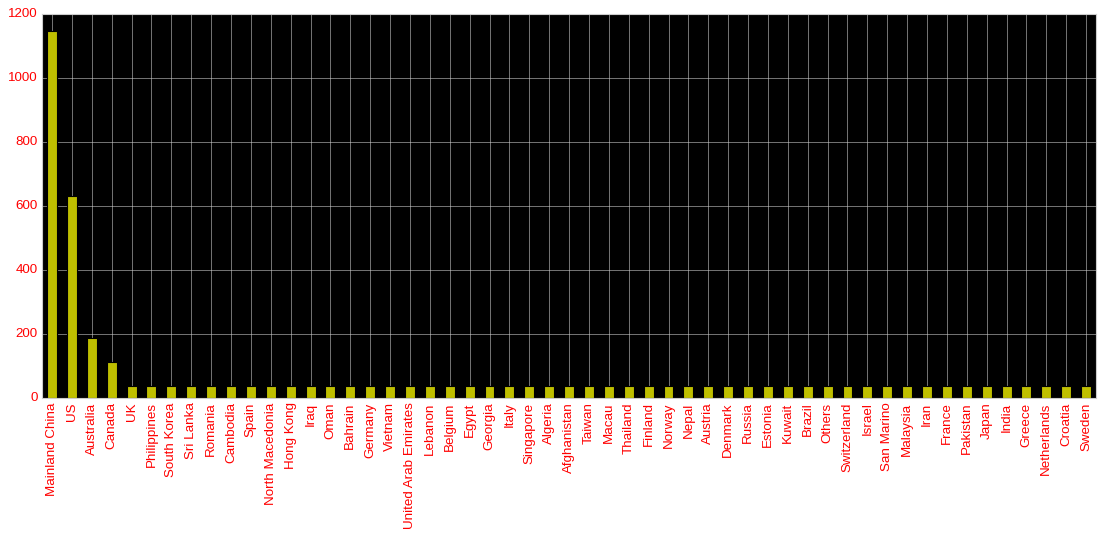

In [201]:
data1 = data['Country_Region'].value_counts().plot(color='y',edgecolor='black',kind='bar',figsize=(17,6))
data1.tick_params(axis='x', colors='red')
data1.tick_params(axis='y', colors='red')
data1.set_facecolor('black')
plt.show()

In [60]:
#how many countrys affected(number)
print('Number of countrys affected:', len(data['Country_Region'].unique()))

Number of countrys affected: 53


In [59]:
#how many countrys affected(names)
display(data['Country_Region'].unique())

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [71]:
display(data.head())

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [73]:
#convert data to geodataframe
geodata = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['Long'],data['Lat']))
display(gdata.head())

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


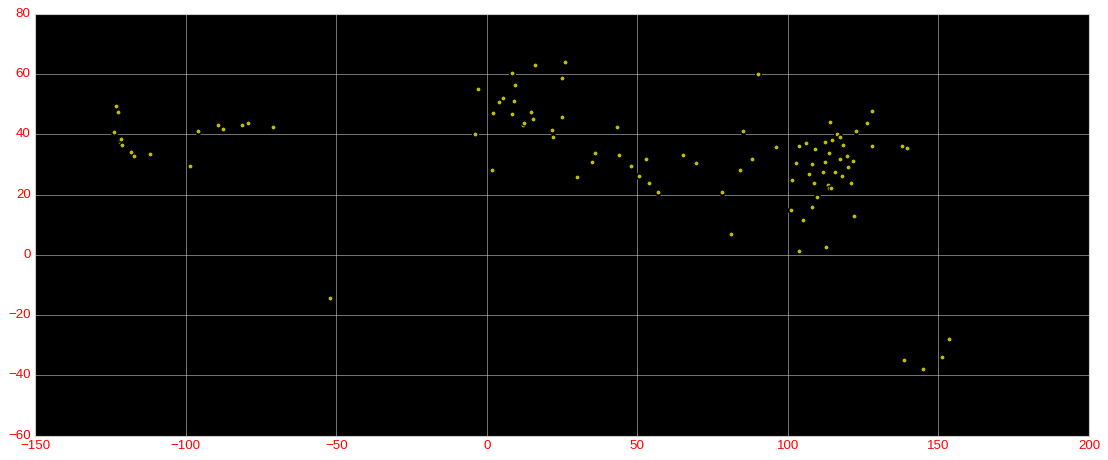

In [224]:
#map_plot
geodata1 = geodata.plot(color='y',edgecolor='black',figsize=(17,8))
geodata1.tick_params(axis='x', colors='red')
geodata1.tick_params(axis='y', colors='red')
geodata1.set_facecolor('black')
plt.show()

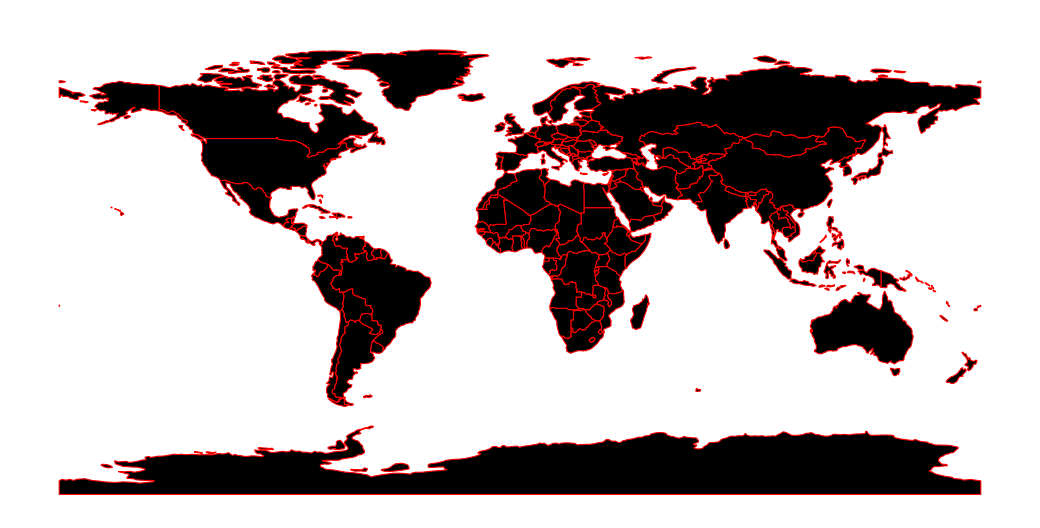

In [178]:
#overlapping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='black',edgecolor='red',figsize=(18,8))
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.axis('off')
plt.show()

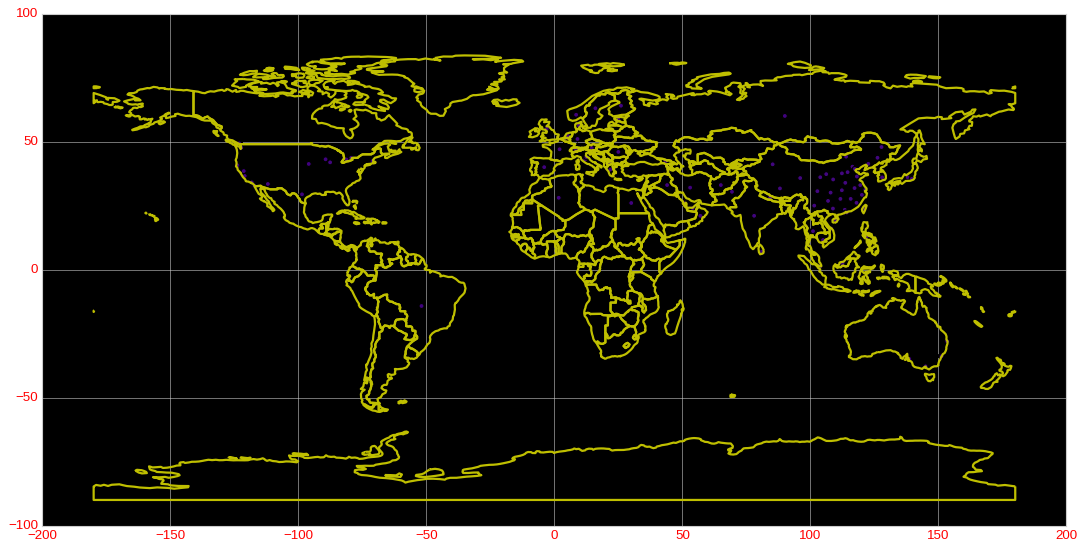

In [225]:
#overlap
fig,ax = plt.subplots(figsize=(18,8))
geodata.plot(cmap='Purples',ax=ax)
world1 = world.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax=ax)
world1.tick_params(axis='x', colors='red')
world1.tick_params(axis='y', colors='red')
world1.set_facecolor('black')
plt.show()

In [81]:
#getting geographic regions
display(world['continent'].unique())

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [86]:
#spliting regions
Asia = world[world['continent'] == 'Asia']
display(Asia.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.0,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.0,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."


In [87]:
Africa = world[world['continent'] == 'Africa']
display(Africa.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


In [88]:
North_america = world[world['continent'] == 'North America']
display(North_america.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."


In [90]:
Europe = world[world['continent'] == 'Europe']
display(Europe.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372..."


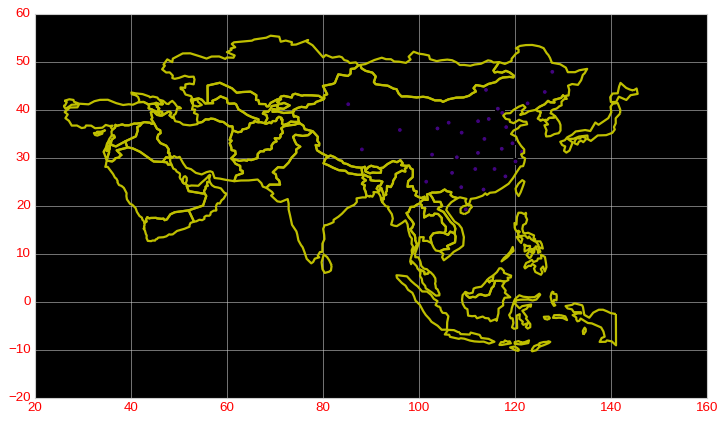

In [226]:
#ploting some of the affected countrys
#mainland_china
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'Mainland China'].plot(cmap = 'Purples',ax=ax)
mainland_china = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
mainland_china.tick_params(axis='x', colors='red')
mainland_china.tick_params(axis='y', colors='red')
mainland_china.set_facecolor('black')
plt.show()

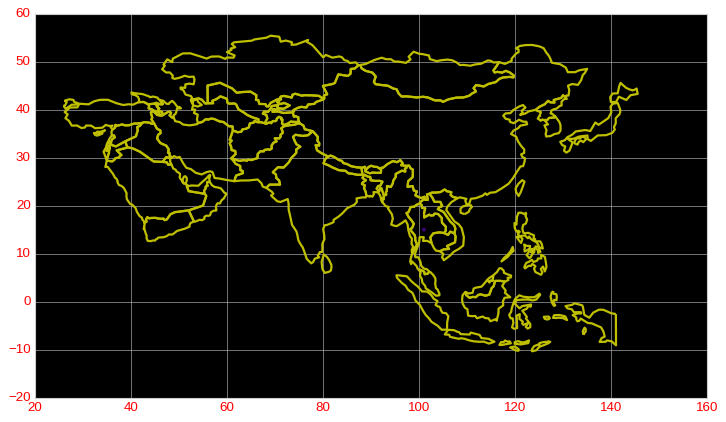

In [227]:
#thailand
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'Thailand'].plot(cmap = 'Purples',ax=ax)
thailand = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
thailand.tick_params(axis='x', colors='red')
thailand.tick_params(axis='y', colors='red')
thailand.set_facecolor('black')
plt.show()

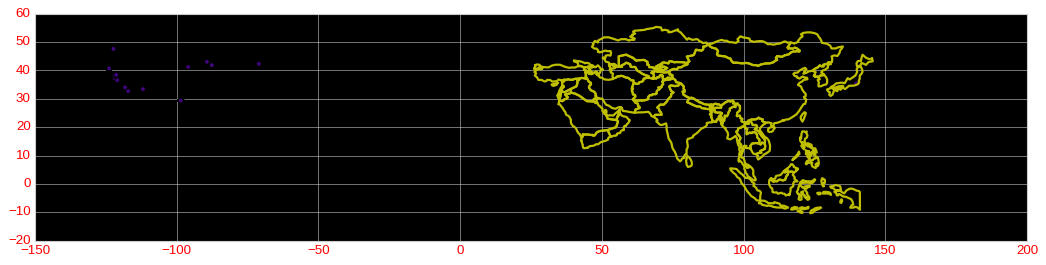

In [228]:
#us
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'US'].plot(cmap = 'Purples',ax=ax)
us = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
us.tick_params(axis='x', colors='red')
us.tick_params(axis='y', colors='red')
us.set_facecolor('black')
plt.show()

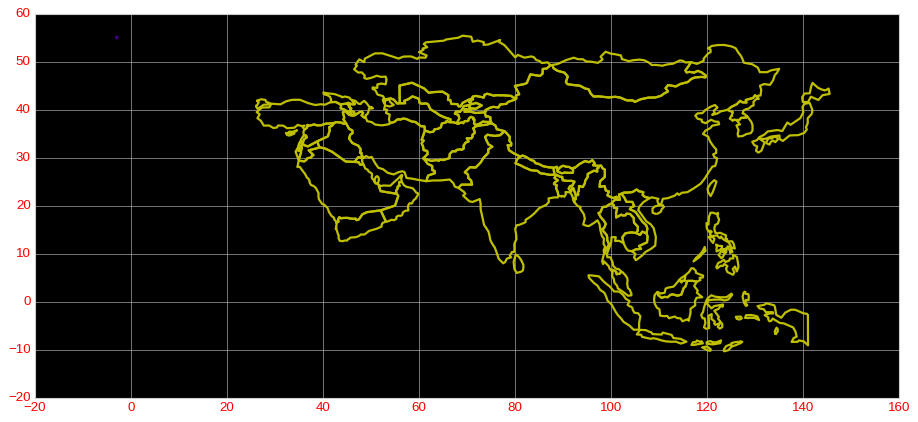

In [229]:
#uk
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'UK'].plot(cmap = 'Purples',ax=ax)
uk = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
uk.tick_params(axis='x', colors='red')
uk.tick_params(axis='y', colors='red')
uk.set_facecolor('black')
plt.show()

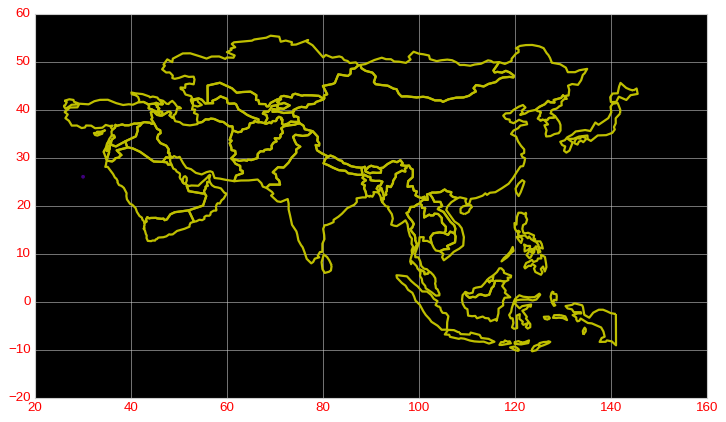

In [230]:
#egypt
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'Egypt'].plot(cmap = 'Purples',ax=ax)
egypt = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
egypt.tick_params(axis='x', colors='red')
egypt.tick_params(axis='y', colors='red')
egypt.set_facecolor('black')
plt.show()

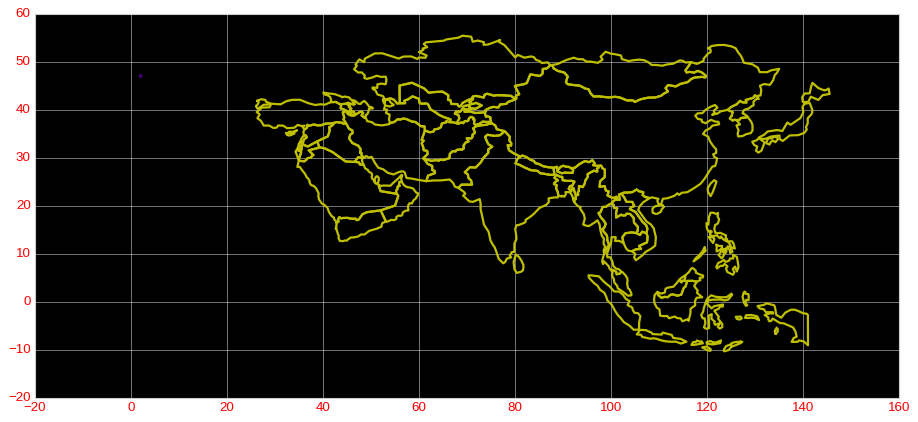

In [231]:
#france
fig,ax = plt.subplots(figsize = (16,6))
geodata[geodata['Country_Region'] == 'France'].plot(cmap = 'Purples',ax=ax)
france = Asia.geometry.boundary.plot(color=None,edgecolor='y',linewidth=2,ax = ax)
france.tick_params(axis='x', colors='red')
france.tick_params(axis='y', colors='red')
france.set_facecolor('black')
plt.show()

In [100]:
#analizing covid-19
display(data.head())

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [101]:
display(data_per_day.head())

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [103]:
#copying covid-19 data
data2 = data
data['cases_date'] = pd.to_datetime(data2['Date'])
display(data)

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110),2020-01-22
...,...,...,...,...,...,...,...,...,...,...
3880,NaN,Romania,45.9432,24.9668,2/27/20,1,0,0,POINT (24.96680 45.94320),2020-02-27
3881,NaN,Denmark,56.2639,9.5018,2/27/20,1,0,0,POINT (9.50180 56.26390),2020-02-27
3882,NaN,Estonia,58.5953,25.0136,2/27/20,1,0,0,POINT (25.01360 58.59530),2020-02-27
3883,NaN,Netherlands,52.1326,5.2913,2/27/20,1,0,0,POINT (5.29130 52.13260),2020-02-27


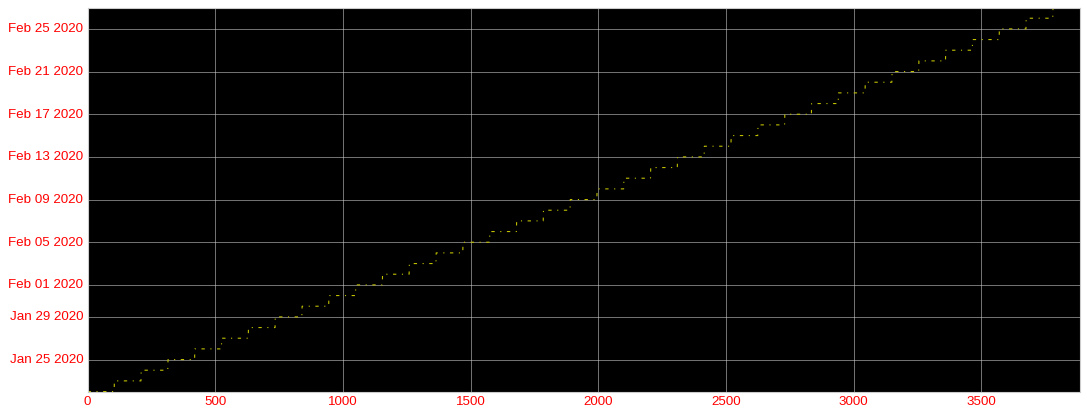

<Figure size 640x480 with 0 Axes>

In [221]:
data3 = data['cases_date'].plot(figsize=(16,6),color='y',linestyle='-.')
plt.style.use('seaborn-whitegrid')
data3.tick_params(axis='x', colors='red')
data3.tick_params(axis='y', colors='red')
data3.set_facecolor('black')
plt.figure()
plt.show()

In [218]:
#cases by date
cd = data2.set_index('cases_date')
display(cd.loc['2020-02'])

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-02-01,Anhui,Mainland China,31.8257,117.2264,2/1/20,297,0,5,POINT (117.22640 31.82570)
2020-02-01,Beijing,Mainland China,40.1824,116.4142,2/1/20,168,1,9,POINT (116.41420 40.18240)
2020-02-01,Chongqing,Mainland China,30.0572,107.8740,2/1/20,247,1,3,POINT (107.87400 30.05720)
2020-02-01,Fujian,Mainland China,26.0789,117.9874,2/1/20,144,0,0,POINT (117.98740 26.07890)
2020-02-01,Gansu,Mainland China,36.0611,103.8343,2/1/20,40,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-02-27,NaN,Romania,45.9432,24.9668,2/27/20,1,0,0,POINT (24.96680 45.94320)
2020-02-27,NaN,Denmark,56.2639,9.5018,2/27/20,1,0,0,POINT (9.50180 56.26390)
2020-02-27,NaN,Estonia,58.5953,25.0136,2/27/20,1,0,0,POINT (25.01360 58.59530)


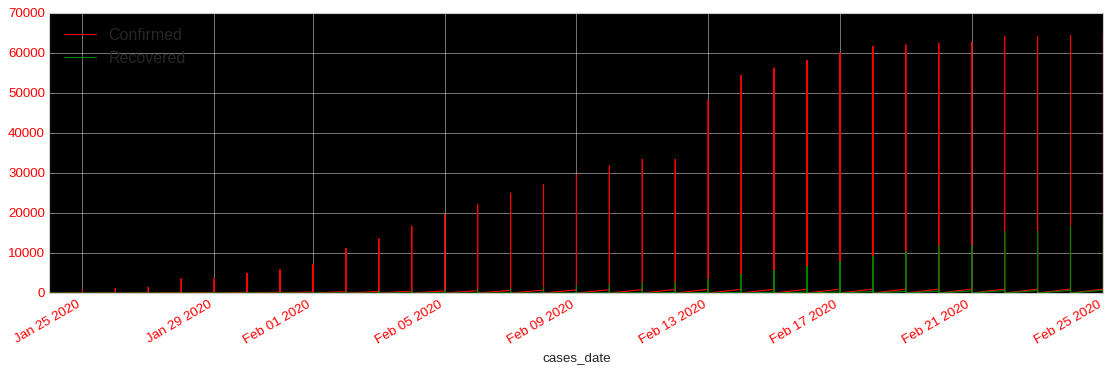

In [235]:
cd2 = cd.loc['2020-01-24' :'2020-02-25'][['Confirmed','Recovered']].plot(color=['red','green'],kind='line',figsize= (17,5))
cd2.tick_params(axis='x', colors='red')
cd2.tick_params(axis='y', colors='red')
cd2.set_facecolor('black')
plt.show()

In [0]:
data_date = cd.groupby(['cases_date']).sum().reset_index(drop=None)

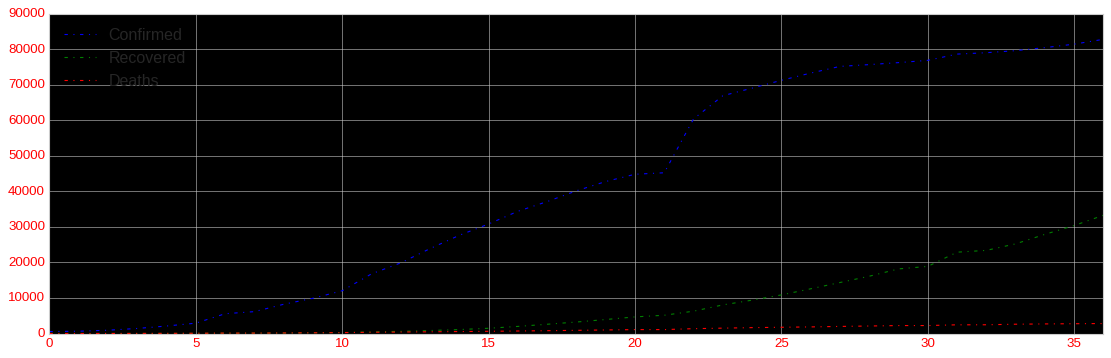

In [220]:
dd = data_date[['Confirmed','Recovered','Deaths']].plot(color=['blue','green','red'],kind='line',figsize=(17,5),linestyle='-.')
dd.tick_params(axis='x', colors='red')
dd.tick_params(axis='y', colors='red')
dd.set_facecolor('black')
plt.show()